<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('mushrooms.csv')

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
# Function to calculate entropy
def calculate_entropy(column):
    """
    Calculate the entropy of a column
    """
    probabilities = column.value_counts(normalize=True)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

In [6]:
# Calculate total entropy of the target variable 'class'
total_entropy = calculate_entropy(df['class'])
print(f"Total Entropy (class): {total_entropy:.4f}")

Total Entropy (class): 0.9991


In [10]:
# Step 2: Calculate Information Gain for cap-color
# Function to calculate information gain
def information_gain(df, split_attribute, target_attribute="class"):
    """
    Calculate the information gain for a given attribute
    """
    # Calculate the total entropy of the target attribute
    total_entropy = calculate_entropy(df[target_attribute])

    # Calculate the weighted entropy of the split attribute
    values = df[split_attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = df[df[split_attribute] == value]
        prob = len(subset) / len(df)
        weighted_entropy += prob * calculate_entropy(subset[target_attribute])

    # Calculate information gain
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Calculate information gain for 'cap-color'
info_gain_cap_color = information_gain(df, "cap-color")
print(f"Information Gain (cap-color): {info_gain_cap_color:.4f}")


Information Gain (cap-color): 0.0360


In [10]:
# Step 3: Find the Best Attribute for Splitting


In [11]:
# Function to find the best attribute for splitting
def best_split_attribute(df, attributes, target_attribute="class"):
    """
    Identify the best attribute to split on based on information gain
    """
    info_gains = {}
    for attribute in attributes:
        info_gains[attribute] = information_gain(df, attribute, target_attribute)

    best_attribute = max(info_gains, key=info_gains.get)
    return best_attribute, info_gains

# List of attributes to evaluate (excluding 'class')
attributes = df.columns.drop('class')

# Identify the best attribute for splitting
best_attribute, info_gains = best_split_attribute(df, attributes)
print(f"Best Attribute for Splitting: {best_attribute}")
print("Information Gains:", info_gains)


Best Attribute for Splitting: odor
Information Gains: {'cap-shape': 0.048796701935373, 'cap-surface': 0.028590232773772706, 'cap-color': 0.0360492829762038, 'bruises': 0.19237948576121955, 'odor': 0.9060749773839998, 'gill-attachment': 0.014165027250616191, 'gill-spacing': 0.10088318399657026, 'gill-size': 0.23015437514804604, 'gill-color': 0.41697752341613126, 'stalk-shape': 0.00751677256966421, 'stalk-root': 0.1348176376272756, 'stalk-surface-above-ring': 0.2847255992184844, 'stalk-surface-below-ring': 0.2718944733927463, 'stalk-color-above-ring': 0.2538451734622398, 'stalk-color-below-ring': 0.24141556652756646, 'veil-type': 0.0, 'veil-color': 0.02381701612091669, 'ring-number': 0.03845266924309043, 'ring-type': 0.3180215107935376, 'spore-print-color': 0.4807049176849153, 'population': 0.2019580190668523, 'habitat': 0.1568336046050921}


In [ ]:
# 2

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# Summary of dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  st

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# Step 3: Summary Statistics

In [16]:
# Summary statistics of categorical variables
print("\nSummary Statistics:")
print(df.describe(include='all'))



Summary Statistics:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1 

<ipython-input-17-041af54a3ed4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


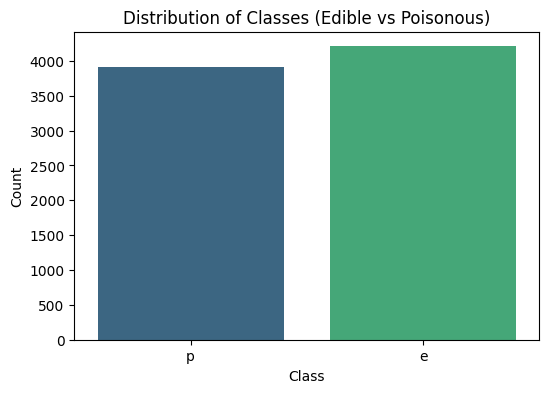

In [17]:
# Step 4: Class Distribution
# Countplot for the target variable 'class'
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title("Distribution of Classes (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
# Step 5: Distribution Analysis of Key Features

<ipython-input-18-6a60e5b7c20f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)


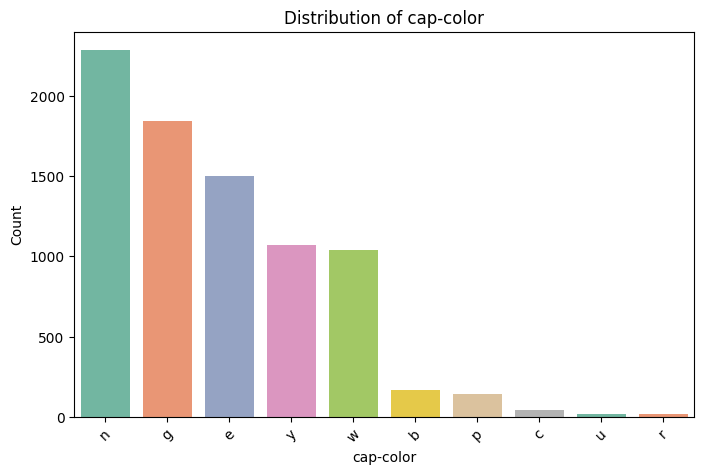

<ipython-input-18-6a60e5b7c20f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)


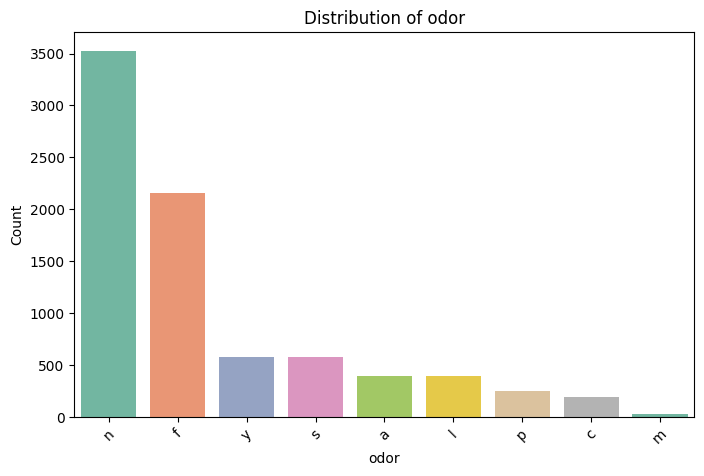

<ipython-input-18-6a60e5b7c20f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)


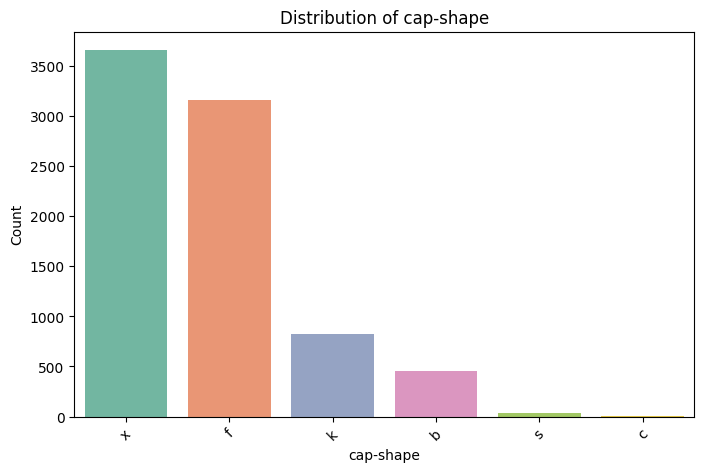

In [18]:
# Select some important features for distribution analysis
features = ['cap-color', 'odor', 'cap-shape']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Step 6: Relationship Between Features and Target Variable

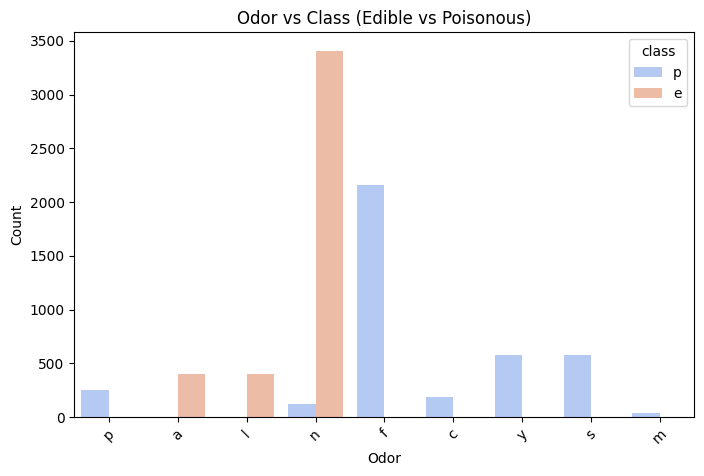

In [19]:
# Relationship between 'odor' and 'class'
plt.figure(figsize=(8, 5))
sns.countplot(x='odor', hue='class', data=df, palette='coolwarm')
plt.title("Odor vs Class (Edible vs Poisonous)")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

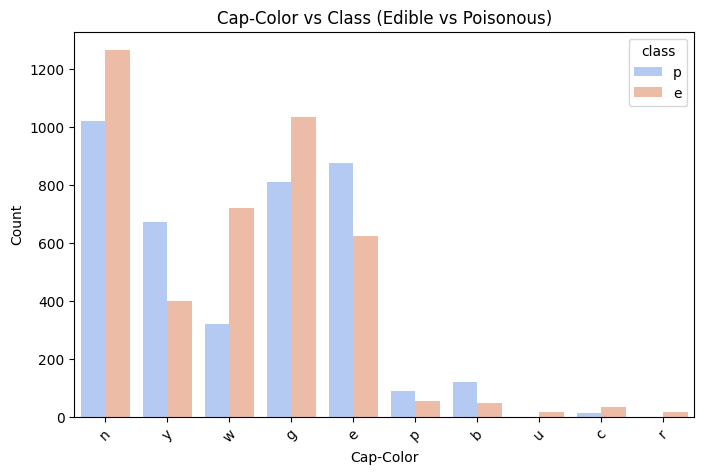

In [20]:
# Relationship between 'cap-color' and 'class'
plt.figure(figsize=(8, 5))
sns.countplot(x='cap-color', hue='class', data=df, palette='coolwarm')
plt.title("Cap-Color vs Class (Edible vs Poisonous)")
plt.xlabel("Cap-Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 7: Heatmap of Correlation (if applicable)

# Since all features are categorical, correlation isn't directly applicable, but we can analyze feature relationships by converting categorical data into numerical form.

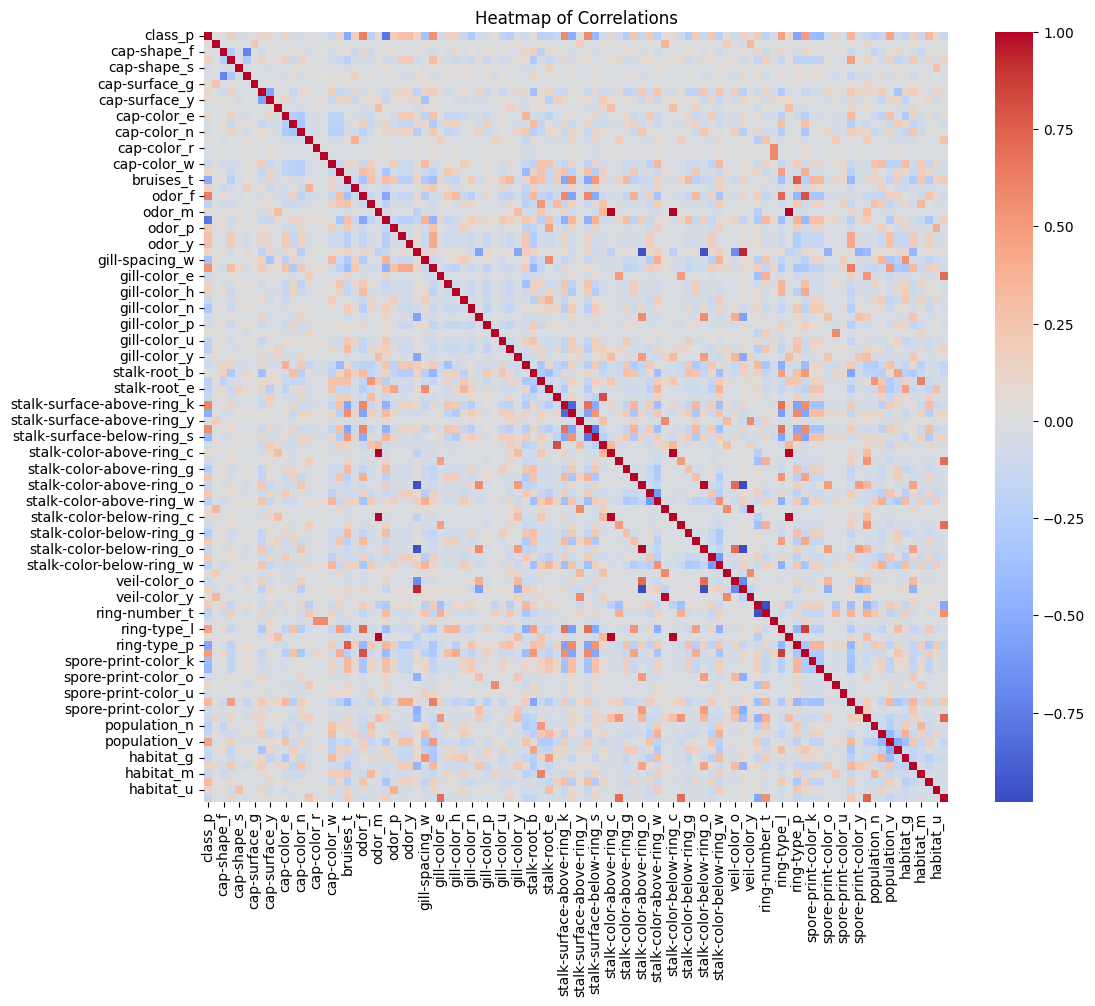

In [21]:
# Convert categorical data to numerical for correlation (optional step)
encoded_df = pd.get_dummies(df, drop_first=True)

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), cmap='coolwarm', annot=False, cbar=True)
plt.title("Heatmap of Correlations")
plt.show()


In [ ]:
#Step 8: Visualizing Pairwise Relationships (Optional)

# Using pair plots can help visualize the relationships between selected features:

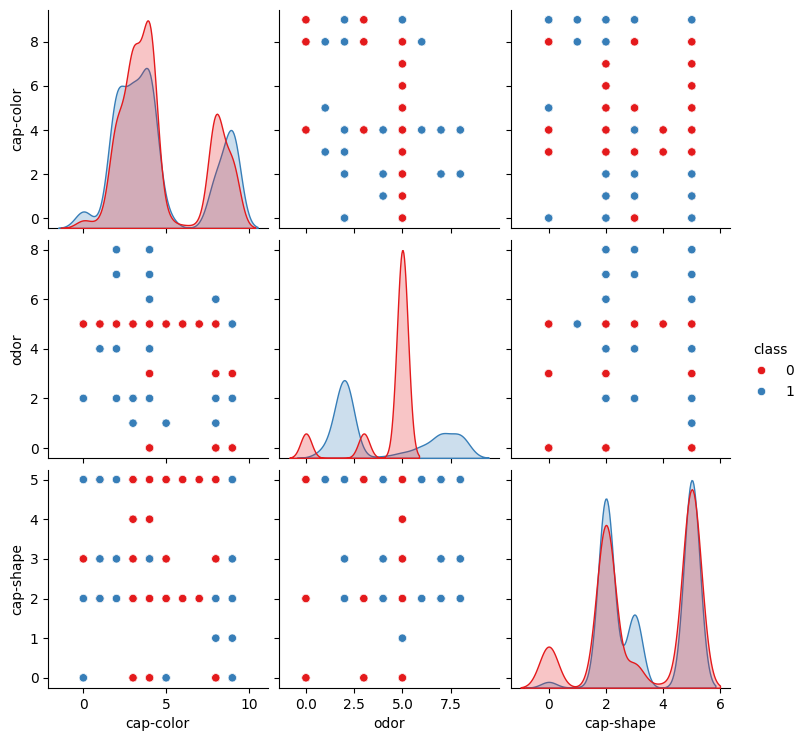

In [24]:
# Encode categorical variables into numerical ones
encoded_df = df[['class', 'cap-color', 'odor', 'cap-shape']].copy()
for column in encoded_df.columns:
    encoded_df[column] = encoded_df[column].astype('category').cat.codes

# Plot pairplot with encoded data
sns.pairplot(encoded_df, hue='class', palette='Set1')
plt.show()


In [26]:
# Pairplot for selected features
selected_features = ['class', 'cap-color', 'odor', 'cap-shape']
sns.pairplot(df[selected_features], hue='class', palette='Set1')
plt.show()


ValueError: No variables found for grid columns.

In [ ]:
# 3 Step 1: Import Necessary Libraries

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [28]:
# Step 2: Preprocess the Dataset

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 3: Define a Function to Evaluate Models

In [29]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train the model and evaluate its performance.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model.__class__.__name__} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

    return accuracy, precision, recall, f1


In [ ]:
# Step 4: Train and Evaluate Each Model

In [30]:
# Initialize models
models = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)


Evaluating GaussianNB...
GaussianNB Performance:
Accuracy: 0.9295
Precision: 0.9279
Recall: 0.9263
F1 Score: 0.9271

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

Evaluating RandomForest...
RandomForestClassifier Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Evaluating DecisionTree...
DecisionTreeClassifier Pe

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:49:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
# Step 5: Compare Model Performance

In [31]:
# Compare performance metrics
performance_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print("\nModel Performance Comparison:")
print(performance_df.sort_values(by="F1", ascending=False))



Model Performance Comparison:
                    Accuracy  Precision    Recall        F1
RandomForest        1.000000   1.000000  1.000000  1.000000
DecisionTree        1.000000   1.000000  1.000000  1.000000
XGBoost             1.000000   1.000000  1.000000  1.000000
KNN                 0.995898   0.992431  0.999153  0.995781
SVC                 0.989336   0.997416  0.980525  0.988898
LogisticRegression  0.949139   0.952096  0.942422  0.947234
GaussianNB          0.929450   0.927905  0.926334  0.927119


In [ ]:
# Step 1: Summarize Performance Metrics same

In [32]:
# Convert results dictionary to a DataFrame
performance_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])

# Sort the DataFrame by F1-score
sorted_performance_df = performance_df.sort_values(by='F1', ascending=False)

# Display the comparison table
print("\nModel Performance Comparison:")
print(sorted_performance_df)



Model Performance Comparison:
                    Accuracy  Precision    Recall        F1
RandomForest        1.000000   1.000000  1.000000  1.000000
DecisionTree        1.000000   1.000000  1.000000  1.000000
XGBoost             1.000000   1.000000  1.000000  1.000000
KNN                 0.995898   0.992431  0.999153  0.995781
SVC                 0.989336   0.997416  0.980525  0.988898
LogisticRegression  0.949139   0.952096  0.942422  0.947234
GaussianNB          0.929450   0.927905  0.926334  0.927119


In [ ]:
#visualzing

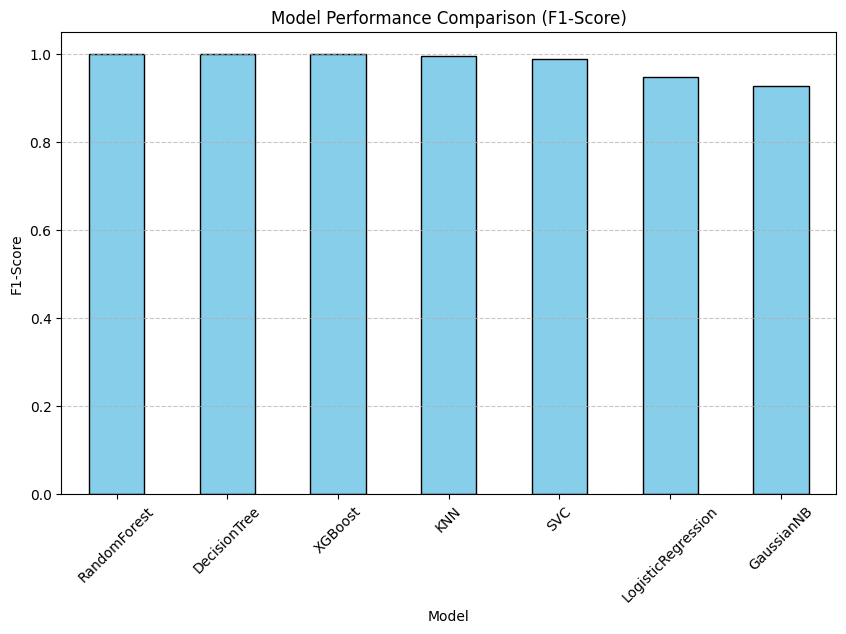

In [33]:
import matplotlib.pyplot as plt

# Plot comparison of F1-scores
plt.figure(figsize=(10, 6))
sorted_performance_df['F1'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Model Performance Comparison (F1-Score)")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
# Analysis of Best-Performing Model

In [34]:
# Get the best-performing model based on F1-score
best_model_name = sorted_performance_df.index[0]
best_model_metrics = sorted_performance_df.loc[best_model_name]

print(f"\nBest-Performing Model: {best_model_name}")
print("Performance Metrics:")
print(f"Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"Precision: {best_model_metrics['Precision']:.4f}")
print(f"Recall: {best_model_metrics['Recall']:.4f}")
print(f"F1-Score: {best_model_metrics['F1']:.4f}")



Best-Performing Model: RandomForest
Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
